<a href="https://colab.research.google.com/github/dnjswnsthd/bnk_py/blob/develop/4_SVM_lab_SWJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>SVM</h1>

# module import

In [30]:
import numpy as np, cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import make_classification, make_blobs, load_digits, load_boston
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error

# Support Vector Machine Classifier
* 선형 지도 학습 분류 알고리즘
* 다차원 공간에서 두 집단을 분리하는 초평면(hyperplane)인 결정면을 탐색
* p차원 공간에서 결정면은 p-1차원
* 두 집단을 분리하는 여러 초평면 중에 두 집단의 간격이  초대화되는 초평면 선택
* 마진(Margin) :두 집단이 서로 가장 가까이 위치한 점
* Support Vector : 마진의 경계선에 있는 샘플
* 결정 평면 : 두 집단을 분할 하는 기준, 마진의 중앙
  * $WX + b = 0$ : decision boundary
  * $WX + b > 0$ : Positive Class
  * $WX + b < 0$ : Negative Class
* ![image.png](https://i.imgur.com/uKvmU3k.png)
* SVM은 마진이 최대가 되는 서포트 벡터를 찾고, 그 마진을 이등분하는 결정면을 찾는 최적화 문제
  * 오차의 최소를 찾는 뿐 아니라 일반화 성능을 최대화 하는 것을 목표표

* Linear Model : $wx+b=0$
  * $wx^+ + b =1$ : plus-plane
  * $wx^- + b =-1$ : minus-plane
  * $x^+ = x^- + \lambda w$ : 평행 이동
  * $w(x^- +\lambda w) + b = 1$
  * $wx^-+b+ \lambda w^2  = 1$
  * $-1 + \lambda w^2 = 1$
  * $ \lambda =  \frac{2}{w^2} = \frac{2}{w^Tw}$
* $margin = distance(x^+, x^-) = \frac{2}{||w||_2}$
  * $distance(x^+, x^-) = ||x^+ - x^-||_2$
  * $ = ||(x^- + \lambda w) - x^- ||_2$
  * $= ||\lambda w||_2$
  * $ = \lambda \sqrt{w^Tw}$
  * $= \frac{2}{w^Tw}\sqrt{w^Tw} $
  * $= \frac{2}{\sqrt{w^Tw}}$
  * $= \frac{2}{||w||_2}$
* 목적식 : $ \text{max} \frac{2}{||w||_2} = \text{min} \frac{1}{2}||w||_2 \iff \text{min} \frac{1}{2}||w||_2^2$
  * 계산의 편의를 위한 제곱
* 제약식 :$y_i(wx_i + b) \ge 1$
  * $\begin{cases}
      wx_i +b \ge 1 & \text{if } y_i = 1  \\
      wx_i +b \lt -1 & \text{if } y_i = -1  
  \end{cases}$
  * Support Vector : $y_i(wx_i + b)= 1$ 

* Hinge Loss
  * $l = max(0, 1-y_i(wx_i+b)$
* Loss 함수
  * $loss = \frac{1}{2}||w||^2_2\alpha + \sum max(0, 1-y_i(wx_i+b)) $
    * $\alpha$ : 목적식과 제약식의 균형을 조정하기 위한 계수
      * 1 보다 작은 수
    * $\text{if } y_i(w_i x_i + b) \ge 1$
      * $ \frac{1}{2}||w||^2_2 \alpha$
    * $\text{if } y_i(w_i x_i + b) \lt 1 $
      * $ \frac{1}{2}||w||^2_2 \alpha+ (1-y_i(wx_i+b))$

* Gradients : Loss 함수의 미분
  * $\text{if } y_i(w_i x_i + b) \ge 1$
    * $\frac{\partial loss}{\partial w} = \alpha w $
    * $\frac{\partial loss}{\partial b} = 0$
  * $\text{if } y_i(w_i x_i + b) \lt 1 $
    * $\frac{\partial loss}{\partial w} =  \alpha w -y_ix_i$
    * $\frac{\partial loss}{\partial b} = -y_i$


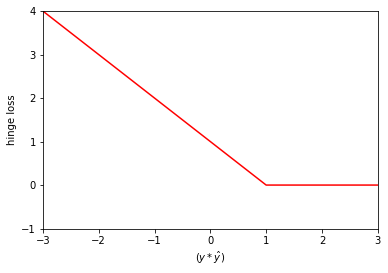

In [2]:
x = np.arange(-3, 4, 0.1)
hinge = np.maximum(0, 1-x)
plt.plot(x, hinge, 'r')
plt.xlabel('$(y * \haty)$')
plt.ylabel('hinge loss')
plt.ylim(-1, 4)
plt.xlim(-3, 3)
plt.show()

In [3]:
class SVM:
    def __init__(self, learning_rate=0.001, alpha=0.01, n_iters=1000):
        self.lr = learning_rate
        self.alpha = alpha
        self.n_iters = n_iters

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        for i in range(self.n_iters):
            for x_i, y_i in zip(X, y):
                condition = y_i * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    self.w -= self.lr * (self.alpha * self.w)
                else:
                    self.w -= self.lr * (
                       self.alpha * self.w - np.dot(x_i, y_i)
                    )
                    self.b -= self.lr * -y_i
    def decision_function(self, X):
      confedence = np.dot(X, self.w) + self.b
      return confedence

    def predict(self, X):
        cfdc = self.decision_function(X)
        return np.sign(cfdc)

## 결정경계 그리기 함수
* 결정경계 : $wx +b=0$
  * 변수가 2개인 식 : $w_0x_0+w_1x_1+b=0$ 
* 2차원 평면에 표현하기 위한 변형
  * $x, y = x_0, x_1$
  * $x_0$은 표본 전체 값으로 고정
  * $x_1 = (-w_0x_0 - b) / w_1$
    * $w_0x_0+w_1x_1+b=0$ 
    * $w_1x_1 = -w_0x_0- b$

In [4]:
def plot_svm(X, w, b, sv=None):
    xmin, xmax = np.min(X[:,0]), np.max(X[:,0])
    x0 = np.linspace(xmin, xmax, 200)
    x1 = (-w[0]*x0-b)/w[1]
    
    margin = 1/w[1] 
    gutter_up = x1 + margin
    gutter_down = x1 - margin
    if sv is not None:
      plt.scatter(sv[:, 0], sv[:, 1], s=180, facecolors='#FFAAAA',
                edgecolors='K', alpha=0.5)
    plt.plot(x0, x1, "g-", linewidth=2)
    plt.plot(x0, gutter_up, "g--", linewidth=2)
    plt.plot(x0, gutter_down, "g--", linewidth=2)

[ 3.60995109  3.69188306 -1.90205149  1.65057438 -2.58194667 -2.89827124
  2.00076298 -1.62162096  2.11289647 -2.41886658  3.70087712  2.45024881
 -2.57186861  2.27766843  3.31920259  4.12590421  2.97862868  2.69606787
  2.92905696  3.38121138 -3.34472224 -2.00980958 -3.15991751 -2.28969803
 -2.33655605 -3.78707562 -3.15259856 -1.00913414 -1.70198021 -2.46016926
  3.37934944  2.12499161 -2.14451214 -1.7910368   1.6968459  -3.53836859
  2.6813113  -3.2056256   1.72421417  3.20153389 -2.7236813  -2.58599156
  1.01238267  2.53376875  3.15515669 -2.72721078 -3.34972988  3.3106889
  3.83018941 -2.52635477]
[ 1.  1. -1.  1. -1. -1.  1. -1.  1. -1.  1.  1. -1.  1.  1.  1.  1.  1.
  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1. -1. -1.  1. -1.
  1. -1.  1.  1. -1. -1.  1.  1.  1. -1. -1.  1.  1. -1.]
acc: 1.0
sv: [-1.00913414  1.01238267]


(-15.0, 5.0)

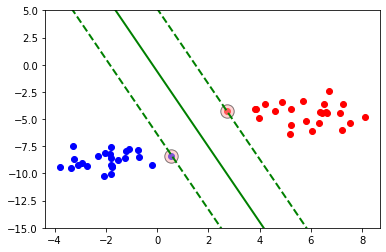

In [16]:
X, y = make_blobs(
    n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40
)
y = np.where(y == 0, -1, 1)
plt.scatter(X[y==1,0], X[y==1,1], marker='o', c='red')
plt.scatter(X[y==-1,0], X[y==-1,1], marker='o', c='blue')

clf = SVM()
clf.fit(X, y)
y_cfdc = clf.decision_function(X)
y_pred = clf.predict(X)
print(y_cfdc)
print(y_pred)
print('acc:', accuracy_score(y, y_pred))

sv_idx = np.where(abs(y_cfdc) <= 1.1)
sv = X[sv_idx]
print('sv:',  y_cfdc[sv_idx])
plot_svm(X, clf.w, clf.b, sv)
plt.ylim((-15,5))

## 랜덤수 분류 예제

(-15.0, 5.0)

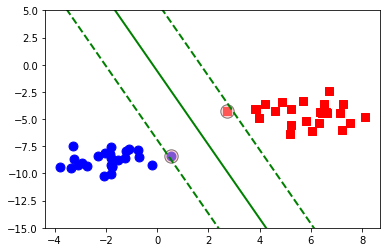

In [21]:
from sklearn.svm import LinearSVC

X, y = make_blobs(
    n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40
)
plt.scatter(X[y==0,0],X[y==0,1],80,'b','o')
plt.scatter(X[y==1,0],X[y==1,1],80,'r','s')

svm = LinearSVC()
svm.fit(X, y)

y_cfdc = svm.decision_function(X)
sv = X[np.abs(y_cfdc) <= 1]
plot_svm(X, svm.coef_[0], svm.intercept_[0], sv)
plt.ylim((-15,5))

# 소프트 마진 분류
* 하드 마진 분류(hard margin classification)
    * 모든 데이터가 마진밖에 있는 경우
    * 샘플에 이상치가 있으면 일반화 오류 발생
* 소프트 마진 분류(Soft margin classification)
  * 목적식 : $\text{minimize} \frac{1}{2}||w||_2^2 + C\sum\xi_i$
  * 제약식 : $y_i(wx_i + b) \ge 1 - \xi_i, \xi_i \ge 0$
    * $\xi_i$ : 슬랙변수, 허용할 에러
    * C 하이퍼 파라미터
      * 마진오류 허용 : 경계 마진 안에 샘플 위치
      * C 값이 작으면 일반화
      * C 값이 커지면 과대 적합

![image.png](https://i.imgur.com/6wYsjb8.png)    

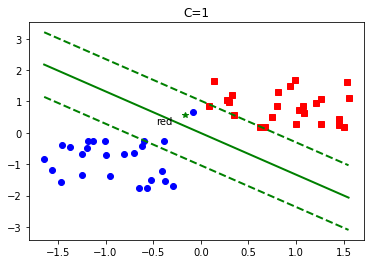

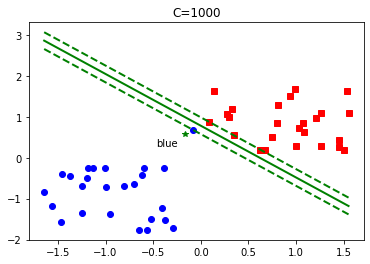

In [25]:
from sklearn.svm import LinearSVC, SVC
np.random.seed(0)
blue = np.random.randint(0,90,(25,2))
red = np.random.randint(110, 200,(25,2))

min_idx = np.argmin(red[:,0]+blue[:,1], axis=0)
blue[0] = red[min_idx]-10 #이상치 생성
newb = blue[0]-5

X = np.float32(np.vstack((blue,red)))
y = np.zeros(50)
y[25:] = 1.0
scaler = StandardScaler()
X = scaler.fit_transform(X)
newb = scaler.transform(newb.reshape(1,2))

# svm1 = LinearSVC(C=1)
# svm2 = LinearSVC(C=1000)
svm1 = SVC(C=1, kernel='linear')
svm2 = SVC(C=1000, kernel='linear')

for svm in [svm1, svm2]:
  svm.fit(X, y)
  y_pred = svm.predict(newb)
  plt.plot(X[y==0, 0], X[y==0, 1], 'bo')
  plt.plot(X[y==1, 0], X[y==1, 1], 'rs')
  plt.plot(newb[:,0], newb[:,1], 'g*')
  plot_svm(X, svm.coef_[0], svm.intercept_)
  plt.annotate('red' if y_pred[0]==1.0 else 'blue', xy=newb[0],
               xytext=(newb[0]-0.3))
  plt.title(f'C={svm.C}')
  plt.show()


# Kernel Trick

## 비선형 및 다항식 커널
* 다항식 특성 추가
 * 특성을 2차식으로 추가
 * $x_2 = (x_1)^2$
![image.png](https://i.imgur.com/iuqFFdK.png)

Text(0.5, 1.0, 'polynomial')

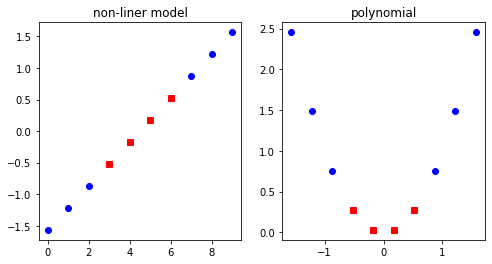

In [26]:
x = np.arange(10, dtype=np.float32)
x -= np.mean(x, axis=0)
x /= np.std(x, axis=0)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(x, 'ob')
plt.plot(np.arange(3,7), x[3:7], 'sr')
plt.title('non-liner model')

x2 = (x**2)
plt.subplot(1,2,2)
plt.plot(x,x2, 'ob')
plt.plot(x[3:7], x2[3:7], 'sr')
plt.title('polynomial')



## 커널 함수
* 차원에 따른 변환을 하지 않고 커널 함수로 새로운 거리 값을 계산
    * 실제로는 아무 특성도 추가하지 않으면서 차원을 변환한 효과
    
* `sklean.svm.SVC(kernel='rbf', gamma=5, C=0.001)`
    * 가우시안 RBF 커널 트릭 사용
    * 다항식 커널 트릭 사용
    * degree :  다항식 차수
    * coef0=0 : 다항식 커널의 상수항
    * 차수가 높아 지면 1보다 크고 작은 값의 격차가 커짐
    * 고차항의 영향 조절

* kernel
 * linear
   * $K(x_i, x_j)= x_ix_j$
   * `SVC(kernel='liner')`
  * polynomial
      * $K(x_i, x_j) = (\gamma(x_i, x_j) + r)^d$
        *  $d$ =degree
        * $\gamma$ =coef0 로 전달
      * `SVC(kernel='ploy', degree=3, coef0=1, C=5)`
          * degree : 다항식 차수
          * coef0=0 : 다항식 커널의 상수항 $r$, 차수가 높아지면 1보다 크고 작은 값의 격차가 커짐, 고차항의 영향 조절
  * rbf : (Gausian radial basis function)
      * $K(x_i, x_j) = exp(\gamma||x_i-x_j||^2)$
          * $\gamma$=gamma > 0, 작아 질수록 마진이 커진다.
      * `SCV(kernel='rbf', gamma=5, C=0.001)`
  * sigmoid 
    * $K(x_i, x_j) = (tanh(\gamma(x_i, x_j) + r))$
      * $r$은 coef0로 전달
    * `SVC(kernel='sigmoid')`

In [28]:
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,\
                                                    random_state=0)
C = [4,5,6]
gamma = np.arange(0.0001,0.0005, 0.0001)
coef0= [5,6,7]
parameters = [
    {"C":C, "kernel":["linear"]},
    {'C':C, 'kernel':['poly'], 'degree':range(2,5), "gamma": gamma, 'coef0':coef0},
    {"C":C, "kernel":["rbf"], "gamma": gamma},
    {"C":C, "kernel":["sigmoid"], "gamma": gamma, 'coef0':coef0},
]

clf = GridSearchCV(SVC(), parameters, cv=5)
clf.fit(X_train, y_train)


AttributeError: ignored

In [29]:
print(clf.best_params_)
clf.score(X_train, y_train), clf.score(X_test, y_test)

{'C': 5, 'gamma': 0.0004, 'kernel': 'rbf'}


(0.9992576095025983, 0.9911111111111112)

# SVR(Support Vector Regressor)
* `sklearn.svm.SVR()`

In [31]:
from sklearn.svm import SVR

boston = load_boston()
X = StandardScaler().fit_transform(boston.data)
X_train, X_test, y_train, y_test = train_test_split(X, boston.target,
                                                    random_state=0)
parameters = {"C":range(1250, 1270, 1),
              "kernel": ["rbf"], 
              "gamma": np.arange(0.003, 0.005, 0.0001)}
gcv = GridSearchCV(SVR(), parameters, cv=5)
gcv.fit(X_train, y_train)
print('best', gcv.best_params_)
print('train', gcv.score(X_train, y_train), 'Test', gcv.score(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

best {'C': 1250, 'gamma': 0.003, 'kernel': 'rbf'}
train 0.9029754125651343 Test 0.7467088723390694
